In [2]:
import sys
sys.path.append("../lropy")

%load_ext autoreload
%autoreload complete

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice
import pickle
from scipy.spatial.transform import Rotation
import cartopy.crs as ccrs

from datetime import datetime, timedelta
from pathlib import Path

In [4]:
from lropy.analysis.spice_tools import as_et, as_utc, as_tdb, generate_lro_ephemeris
from lropy.analysis.io import load_simulation_results, pos_names, acc_names, irr_names, panels_count_names, load_pickled_simulation_results, _get_column_names
from lropy.analysis.plotting import format_plot, save_plot
from lropy.analysis.transform import spher2cart, cart2spher, align_vectors
from lropy.constants import JULIAN_DAY

In [5]:
metadata, runs = load_pickled_simulation_results("../results/tttest-2023-08-09T12-12-45-b7873")

In [6]:
metadata

,id,hostname,start_timestamp,save_dir,simulation_start,target_type,with_instantaneous_reradiation,use_occultation,use_solar_radiation,use_moon_radiation,paneling_moon,number_of_panels_moon,number_of_panels_per_ring_moon,albedo_distribution_moon,thermal_type_moon,simulation_duration,step_size,walltime_duration
1,3ac37,unknown,2023-08-09T12:12:45.110946,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18, 24, 30, 36, 42, 48, 56]",Constant,AngleBased,135.634,10,0.15063
2,d7f03,unknown,2023-08-09T12:12:45.111039,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18, 24, 30, 36]",Constant,AngleBased,135.634,10,0.128416
3,0bdf8,unknown,2023-08-09T12:12:45.111088,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18, 24, 30, 36, 42, 48, 56, 60]",Constant,AngleBased,135.634,10,0.163551
4,10378,unknown,2023-08-09T12:12:45.111113,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18, 24]",Constant,AngleBased,135.634,10,0.121539
5,dde91,unknown,2023-08-09T12:12:45.111144,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18]",Constant,AngleBased,135.634,10,0.120478
6,d89e5,unknown,2023-08-09T12:12:45.111164,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,[6],Constant,AngleBased,135.634,10,0.129587
7,ff093,unknown,2023-08-09T12:12:45.111195,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12]",Constant,AngleBased,135.634,10,0.109284
8,cb5f3,unknown,2023-08-09T12:12:45.111212,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18, 24, 30, 36, 42, 48]",Constant,AngleBased,135.634,10,0.131302
9,756bc,unknown,2023-08-09T12:12:45.111227,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18, 24, 30]",Constant,AngleBased,135.634,10,0.120432
10,8fdf8,unknown,2023-08-09T12:12:45.111238,/home/dominik/dev/hpb-project/results/tttest-2...,2010 AUG 26 06:00:00,Cannonball,False,True,True,True,Dynamic,0,"[6, 12, 18, 24, 30, 36, 42]",Constant,AngleBased,135.634,10,0.115849


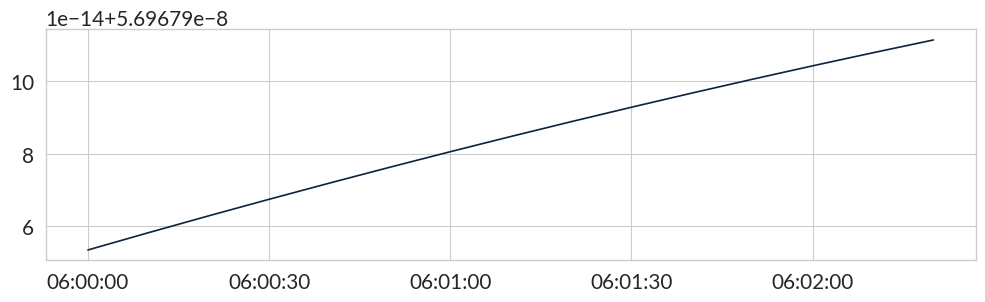

In [8]:
plt.plot(runs[1]["acc_rp_sun"])